# Linear Regression Problem

Xây dựng model cho bài toán hồi quy tuyến tính với 1 biến.
Trình tự thực hiện:
* Xây dựng dataset
* Quan sát sự phân bố của dữ liệu trên dồ thị
* Tạo train, test dataset
* Xây dựng Model
* Cost Function
* Optimization
* Evaluation

Chú ý: 
* Dấu `.` thể hiện phép nhân 2 ma trận, với numpy ta sử dụng method `dot` ví dụ: `X . Y = X.dot(Y)`
* Dấu `*` thể hiện phép nhân giữa các số với nhau ví dụ `a * b`, hoặc phép nhân giữa các phần tử tương ứng của hai ma trận
* X.T là ma trận chuyển vị của X: `X.shape =  (m,n) => X.T.shape = (n,m)`

In [2]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt


## Dataset

In [87]:
x,y = make_regression(n_samples=1000, n_features=1, noise = 15)

x.shape

(1000, 1)

In [88]:
y = y.reshape(y.shape[0], 1)
y.shape

(1000, 1)

## Data analysis

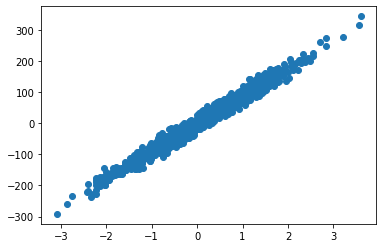

In [89]:
plt.scatter(x,y)

## Train, test Dataset




In [90]:
X = np.hstack((x, np.ones(x.shape)) )

theta = np.random.randn(2,1)

## Modeling
Cho hàm số `y = ax + b` ta có:

Với X là ma trận (m ,2) trong đó có cột thứ 2 chứa toàn phần tử 1. y là vector cột (m, 1). theta là vector cột (2,1) chứa 2 tham số a và b. Viết dưới dạng ma trận:
* Model: `F(x) = X.Theta`
* Cost function: `J = 1/2m * Sum(y-F(x))` Ở đấy sử dụng `Mean Squared Error` thêm hệ số 1/2 để công thức tính đạo hàm trở nên đơn giản hơn.
* Gradient: `G = 1/m * X.T . (F(x) - y)`
* Parameters returned by Method Gradient descent: `Theta = Theta - alpha * G`
* R2 score: `r2 = 1 - Sum((y- F(x))^2) / Sum((y- y_mean)^2)`

In [91]:
theta

array([[-0.84768908],
       [ 0.09247686]])

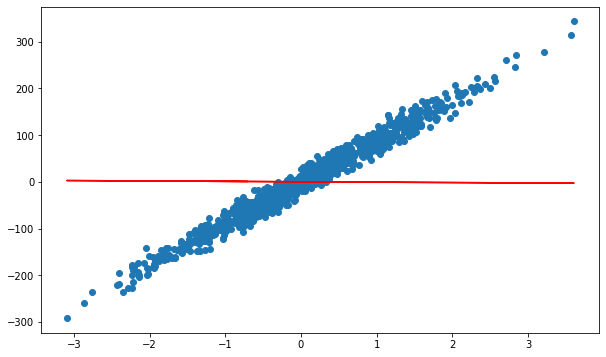

In [92]:
def model(X, theta):
    return X.dot(theta)

plt.figure(figsize=(10,6))
plt.plot(x, model(X,theta), c='r')
plt.scatter(x,y)

In [93]:
def cost_func(X,y, theta):
    m = X.shape[0]
    return (1/(2*m)) * np.sum((model(X,theta) - y)**2)

In [94]:
cost_func(X,y,theta)

4209.218829187156

In [95]:
def gradient(X,y,theta):
    m = X.shape[0]

    return (1/m) * X.T.dot(model(X,theta) - y)

In [96]:
def descent_gradient(X,y,theta, learning_rate, n_interactions):
    err = np.zeros(n_interactions)
    for i in range(0, n_interactions):
        theta = theta - learning_rate * gradient(X,y,theta)
        err[i] = cost_func(X,y,theta)
    return theta, err


In [97]:
n_interactions = 450
learning_rate = 0.01
theta_final, err = descent_gradient(X,y,theta, learning_rate, n_interactions)
theta_final

array([[87.82333202],
       [-0.78718803]])

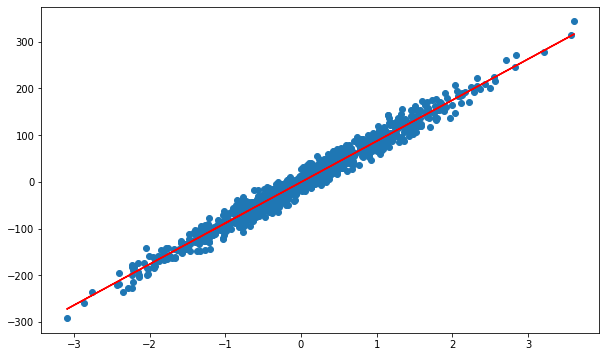

In [98]:
y_pred = model(X, theta_final)

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_pred, c='r')

In [99]:
def r2_score(y, y_pred):
    return 1 - sum((y-y_pred)**2) / sum((y-y.mean())**2)
score = r2_score(y,y_pred)
print(score)

[0.9742196]


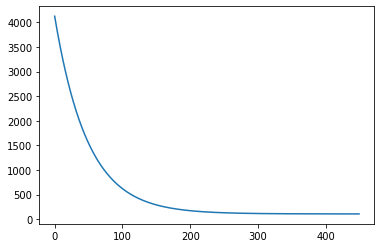

In [100]:
plt.plot(np.arange(n_interactions), err)

* Sai số sẽ giảm rất nhanh sau khi thực hiện khoảng 200 lần lặp, sau đó có thể thấy rằng sai số thay đổi không đáng kể => độ chính xác cũng vì thế mà tăng lên rất ít
* Bằng việc tăng giá trị của learning_rate, ta có thể rút ngắn số lần thực hiên vòng lặp(n_interations giảm) đối với trường hợp dữ liệu mà chúng ta xử lý tương đối lớn.
* Nếu learning_rate lớn sẽ dẫn đến việc chúng ta không thể đạt tới được vị trí cực tiểu, dẫn đến hiệu suất không cao. Trong trường hợp learning rate quá lớn, ta thậm chí không xác định được điểm cực tiểu.